# Welcome to the Inversion Recovery blog post Jupyter Notebook!

If this is your first time running a Juptyer Notebook, there's a lot of tutorials available online to help. [Here's one](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) for your convenience.

## Introduction

This notebook contains everything needed to reproduce the Inversion Recovery T<sub>1</sub> blog post on the [qMRLab website](). In fact, this notebook generated the HTML for the blog post too! This notebook is currently running on a MyBinder server that only you can access, but if you want to be kept up-to-date on any changes that the developpers make to this notebook, you should go to it's [GitHub repository](https://github.com/qMRLab/t1_notebooks) and follow it by clicking the "Watch" button in the top right (you may need to create a GitHub account, if you don't have one already).

## Tips

Here's a few things you can do in this notebook

### Code
* Run the entire processing by clicking above on the "Kernel" tab, then "Restart & Run All". Currently, the processing time is approximately **30-45 minutes**. It will be complete when none of the cells have an asterix "\*" in the square brackets.
* To change the code, you need to click once on code cells. To re-run that cell, click the "Run" button above when the cell is selected.
  * **Note:** Cells can depend on previous cells, or even on previous runs of the cell itself, so it's best to run all the previous cells beforehand.
* This binder runs on SoS, which allows the mixing of Octave (i.e. an open-source MATLAB) and Python cells. Take a look a the drop down menu on the top right of the cells to know which one you are running.
* To transfer data from cells of one language to another, you need to create a new cell in the incoming language and run `%get (param name) --from (outgoing language)`. See cells below for several examples within this notebook.

### HTML
* To reproduce the HTML of the blog post, run the entire processing pipeline (see point one in the previous section), then save the notebook (save icon, top left). Now, click on the drop down menu on the left pannel, and select `%sossave --to html --force` . After a few seconds, it should output "Workflow saved to InversionRecovery.html" – click on the HTML name, and you're done!
* Cells with tags called "scratch" are not displayed in the generated HTML.
* Cells with the tag "report_output" display the output (e.g. figures) in the generated HTML.
* Currently in an un-run notebook, the HTML is not formatted like the website. To do so, run the Python module import cell (`# Module imports`) and then very last cell (`display(HTML(...`).

**If you have any other questions or comments, please raise them in a [GitHub issue](https://github.com/qMRLab/t1_notebooks/issues).**

# Note

The following cell is meant to be displayed for instructional purposes in the blog post HTML when "All cells" gets displayed (i.e. the Octave code).

In [1]:
%use octave
% **Blog post code introduction**
% 
% Congrats on activating the "All cells" option in this interactive blog post =D
%
% Below, several new HTML blocks have appears prior to the figures, displaying the Octave/MATLAB code that was used to generate the figures in this blog post.
%
% If you want to reproduce the data on your own local computer, you simply need to have qMRLab installed in your Octave/MATLAB path and run the "startup.m" file, as is shown below.
%
% If you want to get under the hood and modify the code right now, you can do so in the Jupyter Notebook of this blog post hosted on MyBinder. The link to it is in the introduction above.

In [2]:
%use python3
# PYTHON CODE
# Module imports

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
config={'showLink': False, 'displayModeBar': False}

init_notebook_mode(connected=True)

from IPython.core.display import display, HTML

<center><h1 style="font-family: timesnewroman;font-size: 40px;">Inversion Recovery T<sub>1</sub> Mapping</h1></center>
<p>

<div class=blog_body>
<p style="text-align:justify;">
Widely considered the gold standard for T<sub>1</sub> mapping, the inversion recovery technique estimates T<sub>1</sub> values by fitting the signal recovery curve acquired at different delays after an inversion pulse (180°). In a typical inversion recovery experiment (Figure 1), the magnetization at thermal equilibrium is inverted using a 180° RF pulse. After the longitudinal magnetization recovers through spin-lattice relaxation for predetermined delay (“inversion time”, TI), a 90° excitation pulse is applied, followed by a readout imaging sequence (typically a spin-echo or gradient-echo readout) to create a snapshot of the longitudinal magnetization state at that TI.
</p>

<p style="text-align:justify;">
Inversion recovery was first developed for NMR in the 1940s (Hahn 1949; Drain 1949), and the first T<sub>1</sub> map was acquired using a saturation-recovery technique (90° as a preparation pulse instead of 180°) by (Pykett and Mansfield 1978). Some distinct advantages of inversion recovery are its large dynamic range of signal change and an insensitivity to pulse sequence parameter imperfections (Stikov et al. 2015). Despite its proven robustness at measuring T<sub>1</sub>, inversion recovery is scarcely used in practice, because conventional implementations require repetition times (TRs) on the order of 2 to 5 T<sub>1</sub> (Steen et al. 1994), making it challenging to acquire whole-organ T<sub>1</sub> maps in a clinically feasible time. Nonetheless, it is continuously used as a reference measurement during the development of new techniques, or when comparing different T<sub>1</sub> mapping techniques, and several variations of the inversion recovery technique have been developed, making it practical for some applications (Messroghli et al. 2004; Piechnik et al. 2010).
</p>
</div>

<div class=figure_caption>
<center>
<b style="text-align:justify;">
Figure 1.  Pulse sequence of an inversion recovery experiment.
</b>
</center>
</div>

<p>
<center><img src="ir_pulsesequences.png" style="width:500px;height:auto;"></center>

<center> <h2 style="font-family:timesnewroman;font-size:30px">Signal Modelling</h2> </center>

<div class=blog_body>
<p style="text-align:justify;">
The steady-state longitudinal magnetization of an inversion recovery experiment can be derived from the Bloch equations for the pulse sequence {θ<sub>180</sub> – TI – θ<sub>90</sub> – (TR-TI)}, and is given by:

</p>

<p style="text-align:justify;">
<center><img src="equation1.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px;"></center>
</p>

<p style="text-align:justify;">
where M<sub>z</sub> is the longitudinal magnetization prior to the θ<sub>90</sub> pulse. If the in-phase real signal is desired, it can be calculated by multiplying Eq. 1 by <i>k</i>sin(θ<sub>90</sub>)e<sup>-TE/T<sub>2</sub></sup>, where <i>k</i> is a constant. This general equation can be simplified by grouping together the constants for each measurements regardless of their values (i.e. at each TI, same TE and θ<sub>90</sub> are used) and assuming an ideal inversion pulse:
</p>

<p style="text-align:justify;">
<center><img src="equation2.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px;"></center>
</p>

<p style="text-align:justify;">
where the first three terms and the denominator of Eq. 1 have been grouped together into the constant C. If the experiment is designed such that TR is long enough to allow for full relaxation of the magnetization (TR > 5T<sub>1</sub>), we can do an additional approximation by dropping the last term in Eq. 2:
</p>

<p style="text-align:justify;">
<center><img src="equation3.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px;"></center>
</p>

<p style="text-align:justify;">
The simplicity of the signal model described by Eq. 3, both in its equation and experimental implementation, has made it the most widely used equation to describe the signal evolution in an inversion recovery T<sub>1</sub> mapping experiment. The magnetization curves are plotted in Figure 2 for approximate T<sub>1</sub> values of three different tissues in the brain. Note that in many practical implementations, magnitude-only images are acquired, so the signal measured would be proportional to the absolute value of Eq. 3.
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 2. Inversion recovery curves (Eq. 2) for three different T<sub>1</sub> values, approximating the main types of tissue in the brain.
</b>
</p>
</div>

In [3]:
%use octave
%% MATLAB/OCTAVE CODE
% Adds qMRLab to the path of the environment

cd ../qMRLab
startup

    startup at line 1 column 1
    startup at line 1 column 1
loading struct
loading io
loading statistics
loading optim
loading image


In [4]:
%use octave
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 2 of the blog post

clear all

%% Setup parameters
% All times are in seconds
% All flip angles are in degrees

params.TR = 5.0;
params.TI = linspace(0.001, params.TR, 1000);
            
params.TE = 0.004;
params.T2 = 0.040;
            
params.EXC_FA = 90;  % Excitation flip angle
params.INV_FA = 180; % Inversion flip angle

params.signalConstant = 1;

%% Calculate signals
%
% The option 'GRE-IR' selects the analytical equations for the gradient echo readout inversion recovery experiment
% The option '4' is a flag that selects the long TR approximation of the analytical solution (TR>>T1), Eq. 3 of the blog post.
%
% To see all the options available, run `help inversion_recovery.analytical_solution`

% White matter
params.T1 = 0.900; % in seconds

signal_WM = inversion_recovery.analytical_solution(params, 'GRE-IR', 4);

% Grey matter
params.T1 = 1.500;  % in seconds
signal_GM = inversion_recovery.analytical_solution(params, 'GRE-IR', 4);

% CSF
params.T1 = 4.000;  % in seconds
signal_CSF = inversion_recovery.analytical_solution(params, 'GRE-IR', 4);

In [5]:
%use python3
%get params --from Octave
%get signal_WM --from Octave
%get signal_GM --from Octave
%get signal_CSF --from Octave

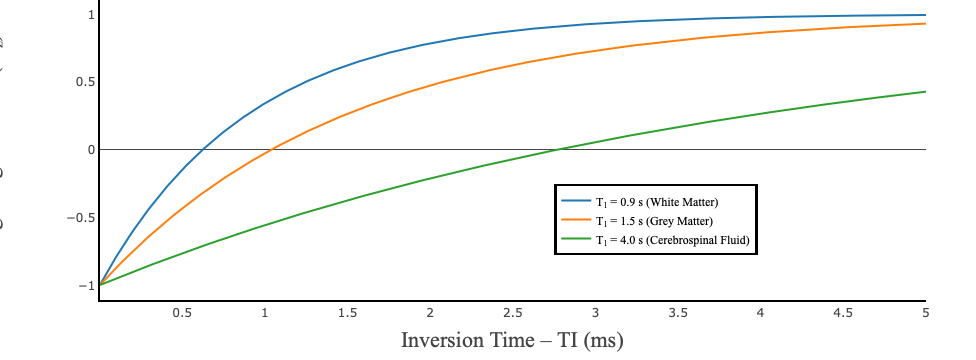

In [6]:
%use python3
# PYTHON CODE

init_notebook_mode(connected=True)
# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.

wm = go.Scatter(
    x = params["TI"],
    y = signal_WM,
    name = 'T<sub>1</sub> = 0.9 s (White Matter)',
    text = 'T<sub>1</sub> = 0.9 s (White Matter)',
    hoverinfo = 'x+y+text'
)

gm = go.Scatter(
    x = params["TI"],
    y = signal_GM,
    name = 'T<sub>1</sub> = 1.5 s (Grey Matter)',
    text = 'T<sub>1</sub> = 1.5 s (Grey Matter)',
    hoverinfo = 'x+y+text'
)

csf = go.Scatter(
    x = params["TI"],
    y = signal_CSF,
    name = 'T<sub>1</sub> = 4.0 s (Cerebrospinal Fluid)',
    text = 'T<sub>1</sub> = 4.0 s (Cerebrospinal Fluid)',
    hoverinfo = 'x+y+text'
)

data = [wm, gm, csf]

layout = go.Layout(
    width=600,
    height=350,
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=60,
        t=0,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.175,
            showarrow=False,
            text='Inversion Time – TI (ms)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.50,
            showarrow=False,
            text='Long. Magnetization (M<sub>z</sub>)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.55,
        y=0.15,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    )
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<div class=blog_body>
<p style="text-align:justify;">
Practically, Eq. 1 is the better choice for simulating the signal of an inversion recovery experiment, as the TRs are often chosen to be greater than 5T<sub>1</sub> of the tissue-of-interest, which rarely coincides with the longest T<sub>1</sub> present (e.g. TR may be sufficiently long for white matter, but not for CSF which could also be present in the volume). Equation 3 also assumes ideal inversion pulses, which is rarely the case due to slice profile effects. Figure 3 displays the inversion recovery signal magnitude (complete relaxation normalized to 1) of an experiment with TR = 5 s and T<sub>1</sub> values ranging between 250 ms to 5 s, calculated using both equations.
<p/>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 3. Signal recovery curves simulated using Eq. 3 (solid) and Eq. 1 (dotted) with a TR = 5 s for T<sub>1</sub> values ranging between 0.25 to 5 s.
</b>
</div>

In [7]:
%use octave
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 3 of the blog post

clear all

%% Setup parameters
% All times are in seconds
% All flip angles are in degrees

params.TR = 5.0;
params.TI = linspace(0.001, params.TR, 1000);
            
params.TE = 0.004;
params.T2 = 0.040;
            
params.EXC_FA = 90;  % Excitation flip angle
params.INV_FA = 180; % Inversion flip angle

params.signalConstant = 1;

T1_range = 0.25:0.25:5; % in seconds

%% Calculate signals
%
% The option 'GRE-IR' selects the analytical equations for the gradient echo readout inversion recovery experiment
% The option '1' is a flag that selects full analytical solution equation (no approximation), Eq. 1 of the blog post.
% The option '4' is a flag that selects the long TR approximation of the analytical solution (TR>>T1), Eq. 3 of the blog post.
%
% To see all the options available, run `help inversion_recovery.analytical_solution`

for ii = 1:length(T1_range)
    params.T1 = T1_range(ii);
    
    signal_T1_Eq1{ii} = inversion_recovery.analytical_solution(params, 'GRE-IR', 1);

    signal_T1_Eq3{ii} = inversion_recovery.analytical_solution(params, 'GRE-IR', 4);
end


In [8]:
%use python3
%get T1_range --from Octave
%get signal_T1_Eq1 --from Octave
%get signal_T1_Eq3 --from Octave

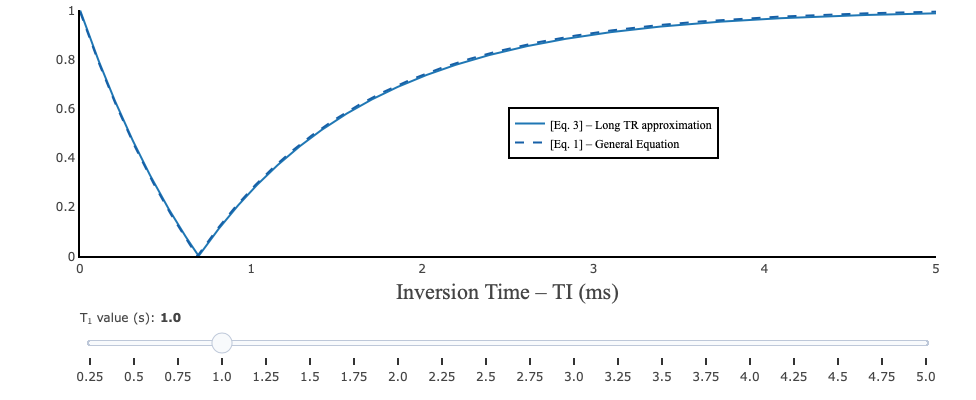

In [9]:
%use python3
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        x = params["TI"],
        y = abs(signal_T1_Eq3[ii]),
        name = '[Eq. 3] – Long TR approximation',
        text = '[Eq. 3] – Long TR approximation',
        hoverinfo = 'x+y+text') for ii in range(len(T1_range))]

data1[3]['visible'] = True

data2 = [dict(
        visible = False,
        x = params["TI"],
        y = abs(signal_T1_Eq1[ii]),
        line = dict(
            color = ('rgb(22, 96, 167)'),
            dash = 'dash'),
        name = '[Eq. 1] – General Equation',
        text = '[Eq. 1] – General Equation',
        hoverinfo = 'x+y+text') for ii in range(len(T1_range))]

data2[3]['visible'] = True

data = data1 + data2

steps = []
for i in range(len(T1_range)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(T1_range[i])
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    x = 0,
    y = -0.0,
    active = 3,
    currentvalue = {"prefix": "T<sub>1</sub> value (s): <b>"},
    pad = {"t": 50, "b": 10},
    steps = steps
)]

layout = go.Layout(
    width=580,
    height=400,
    margin=go.layout.Margin(
        l=80,
        r=40,
        b=60,
        t=10,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.2,
            showarrow=False,
            text='Inversion Time – TI (ms)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.14,
            y=0.5,
            showarrow=False,
            text='Signal (magnitude)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        autorange=False,
        range=[0, 5],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=False,
        range=[0, 1],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.5,
        y=0.5,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<center> <h2 style="font-family:timesnewroman;font-size:30px">Data Fitting</h2> </center>

<div class=blog_body>
<p style="text-align:justify;">
Several factors impact the choice of the inversion recovery fitting algorithm.  If only magnitude images are available, then a polarity-inversion is often implemented to restore the non-exponential magnitude curves (Figure 3) into the exponential form (Figure 2). This process is sensitive to noise due to the Rician noise creating a non-zero level at the signal null. If phase data is also available, then a phase term must be added to the fitting equation (Barral et al. 2010). Equation 3 must only be used to fit data for the long TR regime (TR > 5T<sub>1</sub>), which in practice is rarely satisfied for all tissues in subjects.
</p>

<p style="text-align:justify;">
Early implementations of inversion recovery fitting algorithms were designed around the computational power available at the time. These included the “null method” (Pykett et al. 1983), assuming that each T<sub>1</sub> value has unique zero-crossings (see Figure 2), and linear fitting of a rearranged version of Eq. 3 on a semi-log plot (Fukushima & Roeder 1981). Nowadays, a non-linear least-squares fitting algorithm (e.g. Levenberg-Marquardt) is more appropriate, and can be applied to either approximate or general forms of the signal model (Eq. 3 or Eq. 1). More recent work (Barral et al. 2010) demonstrated that T<sub>1</sub> maps can also be fitted much faster (up to 75 times compared to Levenberg-Marquardt) to fit  Eq. 1 – without a precision penalty – by using a reduced-dimension non-linear least squares (RD-NLS) algorithm. It was demonstrated that the following simplified 5-parameter equation can be sufficient for accurate T<sub>1</sub> mapping:
</p>

<p style="text-align:justify;">
<center><img src="equation4.png" style="width:auto;height:50px;margin-bottom: 50px;margin-top: 50px"></center>
</p>

<p style="text-align:justify;">
where <i>a</i> and <i>b</i> are complex values. If magnitude-only data is available, a 3-parameter model can be sufficient by taking the absolute value of Eq. 4.  While the RD-NLS algorithms are too complex to be presented here (the reader is referred to the paper, (Barral et al. 2010)),  the code for these algorithms <a href="http://www-mrsrl.stanford.edu/~jbarral/t1map.html" target="_blank">was released open-source</a> along with the original publication, and is also available as a <a href="https://github.com/neuropoly/qMRLab" target="_blank">qMRLab</a> T<sub>1</sub> mapping model. One important thing to note about Eq. 4 is that it is general – no assumption is made about TR – and is thus as robust as Eq. 1 as long as all pulse sequence parameters other than TI are kept constant between each measurement. Figure 4 compares simulated data (Eq. 1) using a range of TRs (1.5T<sub>1</sub> to 5T<sub>1</sub>) fitted using either RD-NLS & Eq. 4 or a Levenberg-Marquardt fit of Eq. 2.
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 4. Fitting comparison of simulated data (blue markers) with T<sub>1</sub> = 1 s and TR = 1.5 to 5 s, using fitted using RD-NLS & Eq. 4 (green) and Levenberg-Marquardt & Eq. 2 (orange, long TR approximation).
</b>
</div>

In [10]:
%use octave
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 4 of the blog post

clear all

%% Setup parameters
% All times are in milliseconds
% All flip angles are in degrees

params.TI = 50:50:1500;
TR_range = 1500:50:5000;

params.EXC_FA = 90;
params.INV_FA = 180;

params.T1 = 1000;

%% Calculate signals
%
% The option 'GRE-IR' selects the analytical equations for the gradient echo readout inversion recovery experiment
% The option '1' is a flag that selects full analytical solution equation (no approximation), Eq. 1 of the blog post.
%
% To see all the options available, run `help inversion_recovery.analytical_solution`

for ii = 1:length(TR_range)
    params.TR = TR_range(ii);
    Mz_analytical(ii,:) = inversion_recovery.analytical_solution(params, 'GRE-IR', 1);
end

%% Fit data using Levenberg-Marquardt with the long TR approximation equation
%
% The option '4' is a flag that selects the long TR approximation of the analytical solution (TR>>T1), Eq. 3 of the blog post.
%
% To see all the options available, run `help inversion_recovery.fit_lm`


for ii=1:length(TR_range)
    fitOutput_lm{ii} = inversion_recovery.fit_lm(Mz_analytical(ii,:), params, 4);
    T1_lm(ii) = fitOutput_lm{ii}.T1;
end

%% Fit data using the RDLS method (Barral), Eq. 4 of the blog post.
%

% Create a qMRLab inversion recovery model object and load protocol values
irObj = inversion_recovery();
irObj.Prot.IRData.Mat = params.TI';

for ii=1:length(TR_range)

    data.IRData = Mz_analytical(ii,:);

    fitOutput_barral{ii} = irObj.fit(data);

    T1_barral(ii) = fitOutput_barral{ii}.T1;

end

In [11]:
%use python3
%get params --from Octave
%get Mz_analytical --from Octave
%get fitOutput_lm --from Octave
%get fitOutput_barral --from Octave
%get TR_range --from Octave

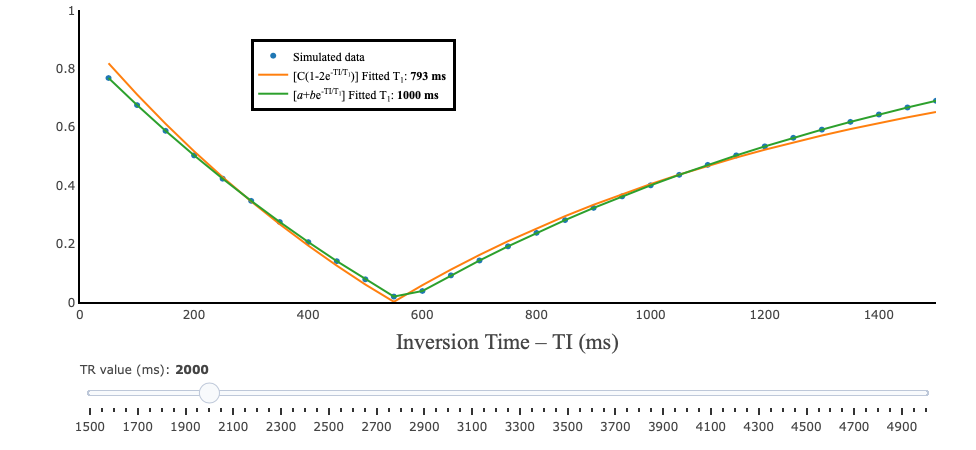

In [12]:
%use python3
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        mode = 'markers',
        x = params["TI"],
        y = abs(np.squeeze(np.asarray(Mz_analytical[ii]))),
        name = 'Simulated data',
        text = 'Simulated data',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data1[10]['visible'] = True

data2 = [dict(
        visible = False,
        mode = 'lines',
        x = params["TI"],
        y = abs(fitOutput_lm[ii]['c'] * (1 - 2*np.exp(-params['TI']/fitOutput_lm[ii]['T1']))),
        name = '[C(1-2e<sup>-TI/T<sub>1</sub></sup>)] Fitted T<sub>1</sub>: <b>' + str(round(fitOutput_lm[ii]['T1'])) + ' ms',
        text = '[C(1-2e<sup>-TI/T<sub>1</sub></sup>)]',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data2[10]['visible'] = True

data3 = [dict(
        visible = False,
        mode = 'lines',
        x = params["TI"],
        y = abs((fitOutput_barral[ii]['ra']+fitOutput_barral[ii]['rb']*np.exp(-params['TI']/fitOutput_barral[ii]['T1']))),
        name = '[<i>a</i>+<i>b</i>e<sup>-TI/T<sub>1</sub></sup>] Fitted T<sub>1</sub>: <b>' + str(round(fitOutput_barral[ii]['T1'])) + ' ms',
        text = '[<i>a</i>+<i>b</i>e<sup>-TI/T<sub>1</sub></sup>]',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data3[10]['visible'] = True



data = data1 + data2 + data3

steps = []
for i in range(len(TR_range)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(TR_range[i])
        )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    x = 0,
    y = -0.02,
    active = 10,
    currentvalue = {"prefix": "TR value (ms): <b>"},
    pad = {"t": 50, "b": 10},
    steps = steps
)]

layout = go.Layout(
    width=580,
    height=450,
    margin=go.layout.Margin(
        l=80,
        r=40,
        b=60,
        t=10,
    ),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.18,
            showarrow=False,
            text='Inversion Time – TI (ms)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.14,
            y=0.5,
            showarrow=False,
            text='Signal (magnitude)',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis=dict(
        autorange=False,
        range=[0, params['TI'][-1]],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=False,
        range=[0, 1],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    legend=dict(
        x=0.2,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<div class=blog_body>
<p style="text-align:justify;">
Figure 5 displays an example brain dataset from an inversion recovery experiment, along with the T<sub>1</sub> map fitted using the RD-NLS technique.
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 5. Figure 5. Example inversion recovery dataset of a healthy adult brain (left). Inversion times used to acquire this magnitude image dataset were 30 ms, 530 ms, 1030 ms, and 1530 ms, and the TR used was 1550 ms. The T<sub>1</sub> map (right) was fitted using a RD-NLS algorithm.
</b>
</div>

In [13]:
%use octave
%% MATLAB/OCTAVE CODE
% Download inversion recovery brain MRI data for Figure 5 of the blog post

cmd = ['curl -L -o ir_brain.zip https://osf.io/ezv74/download/'];
[STATUS,MESSAGE] = unix(cmd);
unzip('ir_brain.zip');


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1300      0 --:--:-- --:--:-- --:--:--  1296
100  154k  100  154k    0     0  91528      0  0:00:01  0:00:01 --:--:-- 1065k


In [14]:
%use octave
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 5 of the blog post

clear all

% Load data into environment, and rotate mask to be aligned with IR data
load('IRData.mat');
load('IRMask.mat');

IRData = data;
Mask = imrotate(Mask,180);
clear data

% Format qMRLab inversion_recovery model parameters, and load them into the Model object
Model = inversion_recovery; 
TI = [30; 530; 1030; 1530];
Model.Prot.IRData.Mat = [TI];

% Format data structure so that they may be fit by the model
data = struct();
data.IRData= double(IRData);
data.Mask= double(Mask);

FitResults = FitData(data,Model,0); % The '0' flag is so that no wait bar is shown.

Fitting voxel     0/5814


In [15]:
%use octave
%% MATLAB/OCTAVE CODE
% Code used to re-orient the images to make pretty figures, and to assign variables with the axis lengths.

T1_map = imrotate(FitResults.T1.*Mask,-90);
xAxis = [0:size(T1_map,2)-1];
yAxis = [0:size(T1_map,1)-1];

% Raw MRI data at different TI values
TI_0030 = imrotate(squeeze(IRData(:,:,:,1).*Mask),-90);
TI_0530 = imrotate(squeeze(IRData(:,:,:,2).*Mask),-90);
TI_1030 = imrotate(squeeze(IRData(:,:,:,3).*Mask),-90);
TI_1530 = imrotate(squeeze(IRData(:,:,:,4).*Mask),-90);

In [16]:
%use python3
%get T1_map --from Octave
%get TI_0030 --from Octave
%get TI_0530 --from Octave
%get TI_1030 --from Octave
%get TI_1530 --from Octave
%get xAxis --from Octave
%get yAxis --from Octave

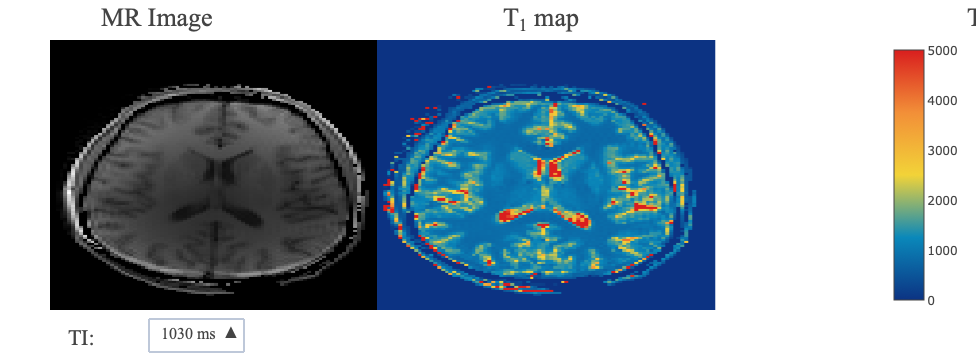

In [17]:
%use python3
from plotly import tools
trace1 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TI_0030,
                   colorscale='Greys',
                   showscale = False,
                   visible=False,
                   name = 'Signal')
trace2 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TI_0530,
                   colorscale='Greys',
                   showscale = False,
                   visible=False,
                   name = 'Signal')
trace3 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TI_1030,
                   colorscale='Greys',
                   showscale = False,
                   visible=True,
                   name = 'Signal')
trace4 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=TI_1530,
                   colorscale='Greys',
                   visible=False,
                   showscale = False,
                   name = 'Signal')
trace5 = go.Heatmap(x = xAxis,
                   y = yAxis,
                   z=T1_map,
                   colorscale='Portland',
                   xaxis='x2',
                   yaxis='y2',
                   visible=True,
                   name = 'T1 values (ms)')

data=[trace1, trace2, trace3, trace4, trace5]


updatemenus = list([
    dict(active=2,
         x = 0.12,
         xanchor = 'left',
         y = -0.15,
         yanchor = 'bottom',
         direction = 'up',
         font=dict(
                family='Times New Roman',
                size=16
            ),
         buttons=list([   
            dict(label = '30 ms',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, True]},
                         ]),
            dict(label = '530 ms',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, True]},
                         ]),
            dict(label = '1030 ms',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, True]},
                         ]),
            dict(label = '1530 ms',
                 method = 'update',
                 args = [{'visible': [False,False, False, True, True]},
                         ])
        ]),
    )
])

layout = dict(
    width=560,
    height=345,
    margin = dict(
                t=40,
                r=50,
                b=10,
                l=50),
    annotations=[
        dict(
            x=0.06,
            y=1.15,
            showarrow=False,
            text='MR Image',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.6,
            y=1.15,
            showarrow=False,
            text='T<sub>1</sub> map',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=1.22,
            y=1.15,
            showarrow=False,
            text='T<sub>1</sub> (ms)',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.02,
            y=-0.15,
            showarrow=False,
            text='TI:',
            font=dict(
                family='Times New Roman',
                size=22
            ),
            xref='paper',
            yref='paper'
        ),
    ],
    xaxis = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 0.6]),
    yaxis = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 1]),
    xaxis2 = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0.4, 1]),
    yaxis2 = dict(range = [0,127], autorange = False,
             showgrid = False, zeroline = False, showticklabels = False,
             ticks = '', domain=[0, 1], anchor='x2'),
    showlegend = False,
    autosize = False,
    updatemenus=updatemenus
)


fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-heatmap', config = config)

<center> <h2 style="font-family:timesnewroman;font-size:30px">Benefits and Pitfalls</h2> </center>

<div class=blog_body>
<p style="text-align:justify;">
The conventional inversion recovery experiment is considered the gold standard T<sub>1</sub> mapping technique for several reasons. A typical protocol has a long TR value and a sufficient number of inversion times for stable fitting (typically 5 or more) covering the range [0, TR]. It offers a wide dynamic range of signals (up to [-<i>k</i>M<sub>0</sub>, <i>k</i>M<sub>0</sub>]), allowing a number of inversion times where high SNR is available to sample the signal recovery curve (Fukushima 1981). T<sub>1</sub> maps produced by inversion recovery are largely insensitive to inaccuracies in excitation flip angles and imperfect spoiling (Stikov et al. 2015), as all parameters except TI are constant for each measurement and only a single acquisition is performed (at TI) during each TR. One important pulse sequence design consideration is to avoid acquiring at inversion times where the signal for T<sub>1</sub> values of the tissue-of-interest is nulled, as the magnitude images at this TI time will be dominated by Rician noise which can negatively impact the fit under low SNR circumstances (Figure 6). Inversion recovery can also often be acquired using commonly available standard pulse sequences available on most MRI scanners by setting up a customized acquisition protocol, and does not require any additional calibration measurements.
</p>
</div>

<div class=figure_caption>
<p style="text-align:justify;">
<b>
Figure 6. Monte Carlo simulations (mean and standard deviation (STD), blue markers) and fitted T<sub>1</sub> values (mean and STD, red and green respectively) generated for a T<sub>1</sub> value of 900 ms and 5 TI values linearly spaced across the TR (ranging from 1 to 5 s). A bump in T<sub>1</sub> STD occurs near TR = 3000 ms, which coincides with the TR where the second TI is located near a null point for this T<sub>1</sub> value. 
</b>
</div>

In [ ]:
%use octave
%% MATLAB/OCTAVE CODE
% Code used to generate the data required for Figure 6 of the blog post

clear all

%% Setup parameters
% All times are in seconds
% All flip angles are in degrees

TR_range = 1000:100:5000; % in seconds

x = struct;
x.T1 = 900; % in seconds

Opt.SNR = 25;
Opt.M0 = 1;
Opt.FAexcite = 90; % Excitation flip angle
Opt.FAinv = 180;   % Inversion flip angle

%% Monte Carlo data simulation
% Simulate noisy signal data 1,000 time, fit the data, then calculate the means and standard deviations of the data and fitted T1
% Data is calculated by calculating the a and b values of Eq. 4 from the full analytical equations (Eq. 1)

Model = inversion_recovery; 

for ii = 1:length(TR_range)
    Opt.TR = TR_range(ii);
    Opt.T1 = x.T1;
    TI_lowres(ii,:) = linspace(0.05, Opt.TR, 6)';
    Model.Prot.IRData.Mat = [TI_lowres(ii,:)];
    [ra,rb] = Model.ComputeRaRb(x,Opt);
    x.rb = rb;
    x.ra = ra;
    for jj = 1:1000
        [FitResult{ii,jj}, noisyData{ii,jj}] = Model.Sim_Single_Voxel_Curve(x,Opt,0); 
        fittedT1(ii,jj) = FitResult{ii,jj}.T1;
        noisyData_array(ii,jj,:) = noisyData{ii,jj}.IRData;
    end
        
    for kk=1:length(TI_lowres(ii,:))
        data_mean(ii,kk) = mean(noisyData_array(ii,:,kk));
        data_std(ii,kk) = std(noisyData_array(ii,:,kk));
    end
    
    T1_mean(ii) = mean(fittedT1(ii,:));
    T1_std(ii) = std(fittedT1(ii,:));
end

%% Calculate the noiseless data at a higher TI resolution to plot the ideal signal curve.
%

for ii = 1:length(TR_range)
    TI_highres(ii,:) = linspace(0.05, TR_range(ii), 500);
    Model.Prot.IRData.Mat = [TI_highres(ii,:)];
    Opt.TR = TR_range(ii);
    Opt.T1 = x.T1;
    [ra,rb] = Model.ComputeRaRb(x,Opt);
    x.rb = rb;
    x.ra = ra;

    data_noiseless(ii,:) = Model.equation(x);
end

In [ ]:
%use python3
%get TR_range --from Octave
%get TI_lowres --from Octave
%get TI_highres --from Octave
%get T1_mean --from Octave
%get T1_std --from Octave
%get data_mean --from Octave
%get data_std --from Octave
%get data_noiseless --from Octave

In [ ]:
%use python3
# PYTHON CODE

init_notebook_mode(connected=True)

data1 = [dict(
        visible = False,
        x = np.squeeze(np.asarray(TI_lowres[ii,:])),
        y = np.squeeze(np.asarray(data_mean[ii,:])),
        error_y=dict(
            type='data',
            color = ('rgb(22, 96, 167)'),
            array=np.squeeze(np.asarray(data_std[ii,:])),
            visible=True
        ),
        line = dict(
            color = ('rgb(22, 96, 167)'),
            dash = 'dot'),
        mode = 'markers',
        name = 'Monte Carlo simulated signal',
        text = 'Monte Carlo simulated signal',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data1[28]['visible'] = True

data2 = [dict(
        visible = False,
        x = np.squeeze(np.asarray(TI_highres[ii,:])),
        y = np.squeeze(np.asarray(data_noiseless[ii,:])),
        line = dict(
            color = ('rgb(247, 152, 19)'),
            ),
        name = 'Noiseless signal',
        text = 'Noiseless signal',
        hoverinfo = 'x+y+text') for ii in range(len(TR_range))]

data2[28]['visible'] = True

data_meanT1 = [dict(
    visible = False,
    x = TR_range,
    y = T1_mean,
    name = 'Mean T<sub>1</sub> (s)',
    text = 'Mean T<sub>1</sub> (s)',
    hoverinfo = 'x+y+text',
    xaxis='x2',
    yaxis='y2') for ii in range(len(TR_range))]

data_meanT1[15]['visible'] = True

data_stdT1 = [dict(
    visible = False,
    x = TR_range,
    y = T1_std,
    name = 'STD T<sub>1</sub> (s)',
    text = 'STD T<sub>1</sub> (s)',
    hoverinfo = 'x+y+text',
    xaxis='x2',
    yaxis='y3') for ii in range(len(TR_range))]

data_stdT1[28]['visible'] = True

data = data2 + data1 + data_meanT1 + data_stdT1

steps = []
for i in range(len(TR_range)):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data1)],
        label = str(TR_range[i])
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    x = 0,
    y = -0.02,
    active = 28,
    currentvalue = {"prefix": "TR value (ms): <b>"},
    pad = {"t": 50, "b": 10},
    steps = steps
)]

layout = go.Layout(
    width=540,
    height=540,
    margin = dict(
                t=0,
                r=25,
                b=100,
                l=75),
    annotations=[
        dict(
            x=0.5004254919715793,
            y=-0.17,
            showarrow=False,
            text='Inversion Time – TI (ms)',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.15,
            y=0.5,
            showarrow=False,
            text='Signal (magnitude)',
            font=dict(
                family='Times New Roman',
                size=26
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.76,
            y=0.77,
            showarrow=False,
            text='<b>TR (ms)<b>',
            font=dict(
                family='Times New Roman',
                size=14
            ),
            xref='paper',
            yref='paper'
        ),
        dict(
            x=0.40,
            y=0.35,
            showarrow=False,
            text='<b>Mean T<sub>1</sub> (ms)<b>',
            font=dict(
                family='Times New Roman',
                size=14
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        ),
        dict(
            x=1.00,
            y=0.35,
            showarrow=False,
            text='<b>STD T<sub>1</sub> (ms)<b>',
            font=dict(
                family='Times New Roman',
                size=14
            ),
            textangle=-90,
            xref='paper',
            yref='paper'
        )
    ],
    xaxis=dict(
        autorange=False,
        range=[0, 5000],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    yaxis=dict(
        autorange=False,
        range=[0, 1],
        showgrid=False,
        linecolor='black',
        linewidth=2
    ),
    xaxis2=dict(
        domain=[0.5, 0.90],
        anchor='y2',
        mirror = True,
        side='top',
        ticks='inside',
        showline=True,
    ),
    yaxis2=dict(
        autorange=False,
        range=[500, 1300],
        domain=[0.05, 0.65],
        anchor='x2',
        mirror = True,
        ticks='inside',
        showline=True,
    ),
    yaxis3=dict(
        autorange=False,
        range=[0, 190],
        domain=[0.05, 0.65],
        anchor='x2',
        overlaying='y2',
        side='right',
        ticks='inside',
    ),
    legend=dict(
        x=0.3,
        y=1.35,
        traceorder='normal',
        font=dict(
            family='Times New Roman',
            size=12,
            color='#000'
        ),
        bordercolor='#000000',
        borderwidth=2
    ), 
    sliders=sliders
)

fig = dict(data=data, layout=layout)

iplot(fig, filename = 'basic-line', config = config)

<div class=blog_body>
<p style="text-align:justify;">
Despite a widely acknowledged robustness for measuring accurate T<sub>1</sub> maps, inversion recovery is not often used in studies. An important drawback of this technique is the need for long TR values, generally on the order of a few T<sub>1</sub> for general models (e.g. Eqs. 1 and 4), and up to 5T<sub>1</sub> for long TR approximated models (Eq. 3). It takes about to 10-25 minutes to acquire a single-slice T<sub>1</sub> map using the inversion recovery technique, as only one TI is acquired per TR  (2-5 s) and conventional cartesian gradient readout imaging acquires one phase encode line per excitation (for a total of ~100-200 phase encode lines). The long acquisition time makes it challenging to acquire whole-organ T<sub>1</sub> maps in clinically feasible protocol times. Nonetheless, it is useful as a reference measurement for comparisons against other T<sub>1</sub> mapping methods, or to acquire a single-slice T<sub>1</sub> map of a tissue to get T<sub>1</sub> estimates for optimization of other pulse sequences.
</p>
</div>

<center> <h2 style="font-family:timesnewroman;font-size:30px">Other Saturation-Recovery T<sub>1</sub> Mapping techniques</h2> </center>

<div class=blog_body>
<p style="text-align:justify;">
Several variations of the inversion recovery pulse sequence were developed to overcome challenges like those specified above. Amongst them, the Look-Locker technique (Look and Locker 1970) stands out as one of the most widely used in practice. Instead of a single 90° acquisition per TR, a periodic train of small excitation pulses θ are applied after the inversion pulse, {θ<sub>180</sub> – 𝛕 – θ – 𝛕 – θ – ...}, where  𝛕 = TR/n and n is the number of sampling acquisitions. This pulse sequence samples the inversion time relaxation curve much more efficiently than conventional inversion recovery, but at a cost of lower SNR. However, because the magnetization state of each TI measurement depends on the previous series of θ excitation, it has higher sensitivity to B<sub>1</sub>-inhomogeneities and imperfect spoiling compared to inversion recovery (Gai et al. 2013; Stikov et al. 2015) . Nonetheless, Look-Locker is widely used for rapid T<sub>1</sub> mapping applications, and variants like MOLLI (Modified Look-Locker Inversion recovery) and ShMOLLI (Shortened MOLLI) are widely used for cardiac T<sub>1</sub> mapping (Messroghli et al. 2004; Piechnik et al. 2010)
</p>

<p style="text-align:justify;">
Another inversion recovery variant that’s worth mentioning is saturation recovery, in which the inversion pulse is replaced with a saturation pulse: {θ<sub>90</sub> – TI – θ<sub>90</sub>}. This technique was used to acquire the very first T<sub>1</sub> map (Pykett and Mansfield 1978). Unlike inversion recovery, this pulse sequence does not need a long TR to recover to its initial condition; every θ<sub>90</sub> pulse resets the longitudinal magnetization to the same initial state. However, to properly sample the recovery curve, TIs still need to reach the order of ~T<sub>1</sub>, the dynamic range of signal potential is cut in half ([0, M<sub>0</sub>]), and the short TIs (which have the fastest acquisition times) have the lowest SNRs.
</p>
</div>

<center> <h2 style="font-family:timesnewroman;font-size:30px">Works Cited</h2> </center>

<div class=biblio_body>
<p style="text-align:justify;">
Barral JK, Gudmundson E, Stikov N, et al. (2010) A robust methodology for in vivo T<sub>1</sub> mapping. <i>Magn. Reson. Med.</i> 64(4): 1057–1067.
</p>

<p style="text-align:justify;">
Drain LE (1949) A Direct Method of Measuring Nuclear Spin-Lattice Relaxation Times. <i>Proceedings of the Physical Society. Section A</i> 62(5): 301–306.
</p>

<p style="text-align:justify;">
Fukushima, E. & Roeder, S., 1981. <i>Experimental Pulse NMR. A Nuts and Bolts Approach</i>, Reading, Massachusetts : Addison-Wesley Publ. Comp., Inc.
</p>

<p style="text-align:justify;">
Gai, N.D. et al., 2013. Modified Look-Locker T<sub>1</sub> evaluation using Bloch simulations: human and phantom validation. <i>Magn. Reson. Med.</i>, 69(2), pp.329–336.
</p>

<p style="text-align:justify;">
Hahn, E.L., 1949. An Accurate Nuclear Magnetic Resonance Method for Measuring Spin-Lattice Relaxation Times. <i>Physics Review</i>, 76(1), pp.145–146.
</p>

<p style="text-align:justify;">
Look, D.C. & Locker, D.R., 1970. Time Saving in Measurement of NMR and EPR Relaxation Times. <i>The Review of scientific instruments</i>, 41(2), pp.250–251.
</p>

<p style="text-align:justify;">
Messroghli, D.R. et al., 2004. Modified Look-Locker inversion recovery (MOLLI) for high-resolution T<sub>1</sub> mapping of the heart. <i>Magn. Reson. Med.</i>, 52(1), pp.141–146.
</p>

<p style="text-align:justify;">
Piechnik, S.K. et al., 2010. Shortened Modified Look-Locker Inversion recovery (ShMOLLI) for clinical myocardial T<sub>1</sub>-mapping at 1.5 and 3 T within a 9 heartbeat breathhold. <i>J. Cardiovasc. Magn. Reson.</i>, 12, p.69.
</p>

<p style="text-align:justify;">
Pykett, I.L. et al., 1983. Measurement of spin-lattice relaxation times in nuclear magnetic resonance imaging. <i>Physics in medicine and biology</i>, 28(6), pp.723–729.
</p>

<p style="text-align:justify;">
Pykett, I.L. & Mansfield, P., 1978. A line scan image study of a tumorous rat leg by NMR. <i>Physics in medicine and biology</i>, 23(5), pp.961–967.
</p>

<p style="text-align:justify;">
Steen, R.G. et al., 1994. Precise and accurate measurement of proton T<sub>1</sub> in human brain in vivo: validation and preliminary clinical application. <i>J. Magn. Reson. Imaging</i>, 4(5), pp.681–691.
</p>

<p style="text-align:justify;">
Stikov, N. et al., 2015. On the accuracy of T<sub>1</sub> mapping: Searching for common ground. <i>Magn. Reson. Med.</i>, 73(2), pp.514–522.
</p>
</div>

In [ ]:
%use python3
# PYTHON CODE

display(HTML(
    '<style type="text/css">'
    '.output_subarea {'
        'display: block;'
        'margin-left: auto;'
        'margin-right: auto;'
    '}'
    '.blog_body {'
        'line-height: 2;'
        'font-family: timesnewroman;'
        'font-size: 18px;'
        'margin-left: 0px;'
        'margin-right: 0px;'
    '}'
    '.biblio_body {'
        'line-height: 1.5;'
        'font-family: timesnewroman;'
        'font-size: 18px;'
        'margin-left: 0px;'
        'margin-right: 0px;'
    '}'
    '.note_body {'
        'line-height: 1.25;'
        'font-family: timesnewroman;'
        'font-size: 18px;'
        'margin-left: 0px;'
        'margin-right: 0px;'
        'color: #696969'
    '}'
    '.figure_caption {'
        'line-height: 1.5;'
        'font-family: timesnewroman;'
        'font-size: 16px;'
        'margin-left: 0px;'
        'margin-right: 0px'
    '</style>'
))